In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from statsmodels.distributions import ECDF
from scipy import stats

In [9]:
# Y = 2 / (X + 2); a = -1; b = 5
# f(y) = 1 / (3 * y^2)
# F(y) = -1 / (3 * y) + 7 / 6
a = -1
b = 5
N = 20
LEFT = 2 / 7
RIGHT = 2
np.random.seed(seed=int(time.time()))


def y(x):
    return 2 / (x + 2)


def get_x(n):
    return np.random.random((n,)) * (b - a) + a


def get_ecdf(y):
    return ECDF(y)


def dist_func(y):
    if y <= LEFT:
        return 0
    if y > RIGHT:
        return 1
    return -1 / (3 * y) + 7 / 6


def dist_density(y):
    if y < LEFT or y > RIGHT:
        return 0
    return 1 / (3 * y ** 2)


def get_intervals_number(n):
    if n <= 100:
        return int(np.sqrt(n))
    return int(4 * np.log10(n))


def get_bins_sequence(y):
    length = len(y)
    m = get_intervals_number(length)
    v = int(N / m)
    i = 0
    result_sequence = [y[0]]
    while i < length:
        i += v
        if i < length - 1:
            result_sequence.append((y[i] + y[i + 1]) / 2)
        else:
            result_sequence.append(y[length - 1])

    return result_sequence


def grouped_ECDF(values, bins):
    def _ecdf(x):
        if x < bins[0]:
            return 0
        if x > bins[-1]:
            return 1
        for i in range(len(bins) - 1):
            if bins[i] < x <= bins[i + 1]:
                return values[i]

    return _ecdf

In [10]:
def get_sorted_Y(N):
    X = get_x(N)
    Y = y(X)
    Y = np.sort(Y)
    return Y

In [11]:
def get_point_ME(Y, N):
    point_math_expectation = sum(Y) / N
    print("Point math expectation = {}".format(point_math_expectation))
    return point_math_expectation

In [12]:
def get_mu2(point_math_expectation, Y, N):
    mu2 = 0
    for i in range(N):
        mu2 += (Y[i] - point_math_expectation) ** 2
    mu2 *= 1 / (N - 1)
    print("Точечная оценка дисперсии = {}".format(mu2))
    return mu2

In [13]:
gamma = [0.95, 0.975, 0.99, 0.995]
true_gamma = 1 - (1 - np.array(gamma)) * 2
def get_intervalME(mu2, N, point_math_expectation):
    S = (mu2) ** (1 / 2)
    intervalME = list()
    for g in gamma:
        t = stats.t.ppf(g, N)
        intervalME.append((S * t) / ((N - 1) ** (1 / 2)))
        print("При гамма = {0}\n{1} <= m < {2}\n".format(round(1 - (1 - g) * 2, 2),
                                                         round(point_math_expectation - intervalME[-1], 5),
                                                         round(point_math_expectation + intervalME[-1], 5)))
    return intervalME

In [15]:
D_true = 0.150699
print("Дисперсия случайной величины по известной плотности распределения = {}".format(D_true))

Дисперсия случайной величины по известной плотности распределения = 0.150699


N = 20
Point math expectation = 0.5632720057841729
Точечная оценка дисперсии = 0.11580804681893958
При гамма = 0.9
0.42862 <= m < 0.69792

При гамма = 0.95
0.40042 <= m < 0.72613

При гамма = 0.98
0.36591 <= m < 0.76063

При гамма = 0.99
0.34113 <= m < 0.78541

При известной дисперсии:
При гамма = 0.9
0.40967 <= m < 0.71687

При гамма = 0.95
0.3775 <= m < 0.74905

При гамма = 0.98
0.33813 <= m < 0.78841

При гамма = 0.99
0.30987 <= m < 0.81668



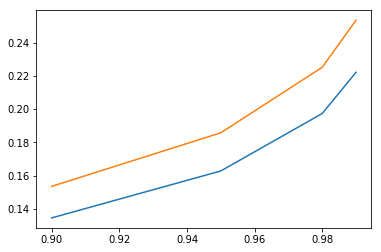

N = 30
Point math expectation = 0.6958431010777225
Точечная оценка дисперсии = 0.13233390617241086
При гамма = 0.9
0.58119 <= m < 0.8105

При гамма = 0.95
0.55788 <= m < 0.8338

При гамма = 0.98
0.52985 <= m < 0.86184

При гамма = 0.99
0.51008 <= m < 0.88161

При известной дисперсии:
При гамма = 0.9
0.57349 <= m < 0.81819

При гамма = 0.95
0.54862 <= m < 0.84306

При гамма = 0.98
0.51871 <= m < 0.87298

При гамма = 0.99
0.4976 <= m < 0.89408



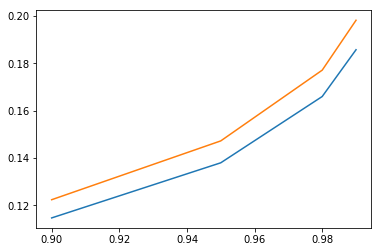

N = 50
Point math expectation = 0.6759974876683266
Точечная оценка дисперсии = 0.1605504369124411
При гамма = 0.9
0.58007 <= m < 0.77193

При гамма = 0.95
0.56103 <= m < 0.79097

При гамма = 0.98
0.53843 <= m < 0.81356

При гамма = 0.99
0.52272 <= m < 0.82928

При известной дисперсии:
При гамма = 0.9
0.58306 <= m < 0.76894

При гамма = 0.95
0.56461 <= m < 0.78739

При гамма = 0.98
0.54272 <= m < 0.80928

При гамма = 0.99
0.52749 <= m < 0.8245



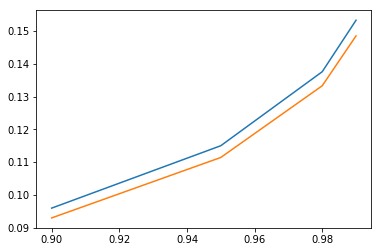

N = 70
Point math expectation = 0.6253512357068763
Точечная оценка дисперсии = 0.153013247947645
При гамма = 0.9
0.54685 <= m < 0.70385

При гамма = 0.95
0.53143 <= m < 0.71927

При гамма = 0.98
0.51324 <= m < 0.73747

При гамма = 0.99
0.50066 <= m < 0.75004

При известной дисперсии:
При гамма = 0.9
0.54745 <= m < 0.70325

При гамма = 0.95
0.53214 <= m < 0.71856

При гамма = 0.98
0.51409 <= m < 0.73662

При гамма = 0.99
0.5016 <= m < 0.7491



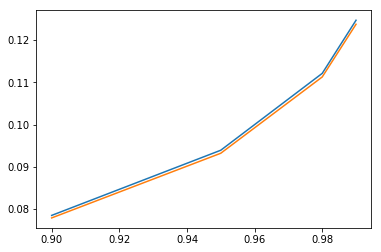

N = 100
Point math expectation = 0.6829303642445749
Точечная оценка дисперсии = 0.16181421052598413
При гамма = 0.9
0.61581 <= m < 0.75005

При гамма = 0.95
0.60272 <= m < 0.76314

При гамма = 0.98
0.58735 <= m < 0.77851

При гамма = 0.99
0.57677 <= m < 0.78909

При известной дисперсии:
При гамма = 0.9
0.61816 <= m < 0.74771

При гамма = 0.95
0.60552 <= m < 0.76034

При гамма = 0.98
0.59069 <= m < 0.77517

При гамма = 0.99
0.58048 <= m < 0.78538



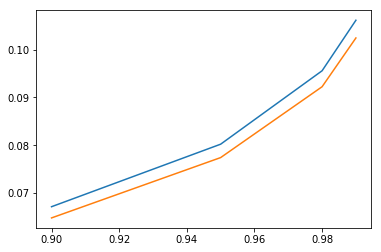

N = 150
Point math expectation = 0.6258891896272603
Точечная оценка дисперсии = 0.114243783847981
При гамма = 0.9
0.58006 <= m < 0.67172

При гамма = 0.95
0.57118 <= m < 0.6806

При гамма = 0.98
0.56078 <= m < 0.691

При гамма = 0.99
0.55365 <= m < 0.69813

При известной дисперсии:
При гамма = 0.9
0.57325 <= m < 0.67852

При гамма = 0.95
0.56305 <= m < 0.68873

При гамма = 0.98
0.55111 <= m < 0.70067

При гамма = 0.99
0.54292 <= m < 0.70886



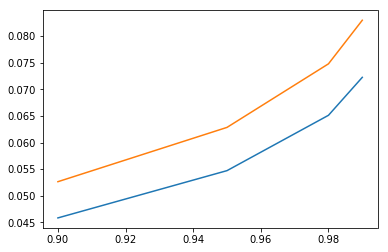

In [17]:
Ns = [20, 30, 50, 70, 100, 150]
dependency = []

for N in Ns:
    print("N = {}".format(N))
    Y = get_sorted_Y(N)
    pointME = get_point_ME(Y, N)
    mu2 = get_mu2(pointME, Y, N)
    intervalME = get_intervalME(mu2, N, pointME)
    dependency.append(intervalME[-1])
    print("При известной дисперсии:")
    intervalME_known_D = get_intervalME(D_true, N, pointME)
    plt.plot(true_gamma, intervalME)
    plt.plot(true_gamma, intervalME_known_D)
    plt.show()

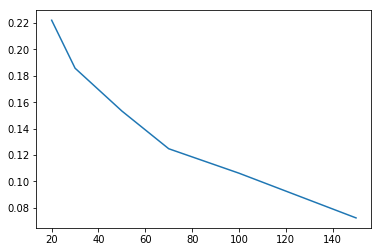

In [18]:
plt.plot(Ns, dependency)

In [19]:
gamma = [0.90, 0.96, 0.98, 0.99]

def get_interval_dis(mu2, N):
    intervalDis = list()
    S = mu2 
    for g in gamma:
        hi2_1 = stats.chi2.ppf(1 - ((1 - g) / 2), N)
        hi2 = stats.chi2.ppf(1 - ((1 + g) / 2), N)
        print("При гамма={},\n {} <= D < {}\n".format(g, 
                                                      round((N*S)/hi2_1, 5),
                                                      (N*S)/hi2))
        intervalDis.append((N*S)/hi2 - (N*S)/hi2_1)
    return intervalDis

N = 20
Point math expectation = 0.6178280572570115
Точечная оценка дисперсии = 0.1156359759150043
При гамма=0.9,
 0.07363 <= D < 0.2131379335871599

При гамма=0.96,
 0.06604 <= D < 0.250383782094585

При гамма=0.98,
 0.06156 <= D < 0.27997675477559614

При гамма=0.99,
 0.05782 <= D < 0.3111068024160122

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.09595 <= D < 0.27776540302007985

При гамма=0.96,
 0.08607 <= D < 0.3263049001774878

При гамма=0.98,
 0.08023 <= D < 0.36487102421256884

При гамма=0.99,
 0.07536 <= D < 0.40544029352726096



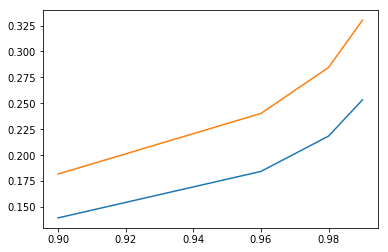

N = 30
Point math expectation = 0.7190385774568588
Точечная оценка дисперсии = 0.13906174197306576
При гамма=0.9,
 0.09531 <= D < 0.2255950218988592

При гамма=0.96,
 0.08698 <= D < 0.25584493798609176

При гамма=0.98,
 0.08197 <= D < 0.27898915887796316

При гамма=0.99,
 0.07773 <= D < 0.30259933484587753

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.10328 <= D < 0.24447374038879005

При гамма=0.96,
 0.09426 <= D < 0.27725509376283886

При гамма=0.98,
 0.08883 <= D < 0.3023361181675214

При гамма=0.99,
 0.08423 <= D < 0.32792209068380024



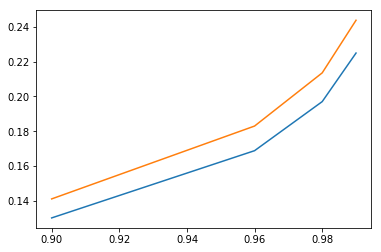

N = 50
Point math expectation = 0.6937860147904708
Точечная оценка дисперсии = 0.16312770016143896
При гамма=0.9,
 0.12083 <= D < 0.2346198929385489

При гамма=0.96,
 0.11233 <= D < 0.2575928644299746

При гамма=0.98,
 0.1071 <= D < 0.27456397911403596

При гамма=0.99,
 0.10261 <= D < 0.29139574103608995

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.11162 <= D < 0.21674420230871533

При гамма=0.96,
 0.10377 <= D < 0.23796686300558165

При гамма=0.98,
 0.09894 <= D < 0.2536449483904814

При гамма=0.99,
 0.09479 <= D < 0.26919429830089725



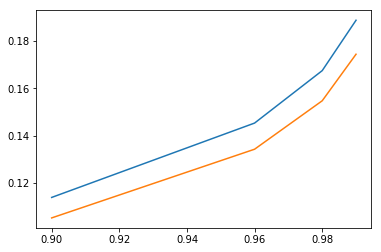

N = 70
Point math expectation = 0.730205252928825
Точечная оценка дисперсии = 0.17164511710175262
При гамма=0.9,
 0.13272 <= D < 0.23222508411795514

При гамма=0.96,
 0.12465 <= D < 0.2508727072199136

При гамма=0.98,
 0.11964 <= D < 0.26440810136953796

При гамма=0.99,
 0.11529 <= D < 0.2776454846224267

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.11652 <= D < 0.20388630065570557

При гамма=0.96,
 0.10944 <= D < 0.22025832568788953

При гамма=0.98,
 0.10504 <= D < 0.23214197491366412

При гамма=0.99,
 0.10122 <= D < 0.24376397996985524



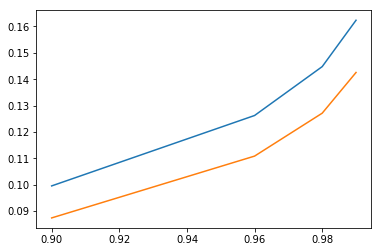

N = 100
Point math expectation = 0.6598443905658767
Точечная оценка дисперсии = 0.16510176090163395
При гамма=0.9,
 0.13278 <= D < 0.21186050815571175

При гамма=0.96,
 0.1259 <= D < 0.22572714441395647

При гамма=0.98,
 0.12157 <= D < 0.2356412024558415

При гамма=0.99,
 0.11779 <= D < 0.24522164889962358

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.1212 <= D < 0.19337871712694515

При гамма=0.96,
 0.11491 <= D < 0.20603568823415364

При гамма=0.98,
 0.11097 <= D < 0.215084886890152

При гамма=0.99,
 0.10751 <= D < 0.2238295767756324



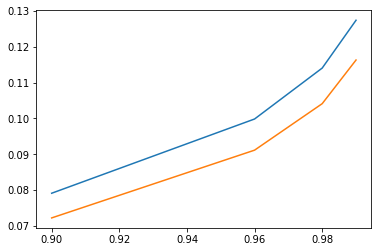

N = 150
Point math expectation = 0.6150560366364227
Точечная оценка дисперсии = 0.12959373194628182
При гамма=0.9,
 0.10825 <= D < 0.15843816531799398

При гамма=0.96,
 0.10358 <= D < 0.16670492544126714

При гамма=0.98,
 0.10061 <= D < 0.17253463066529873

При гамма=0.99,
 0.098 <= D < 0.17810756264094615

Точное матожидание: 0.6486367163517711
При точном матожидании:
При гамма=0.9,
 0.12588 <= D < 0.18424095607612767

При гамма=0.96,
 0.12044 <= D < 0.1938540173338553

При гамма=0.98,
 0.117 <= D < 0.20063313183547718

При гамма=0.99,
 0.11396 <= D < 0.2071136557249058



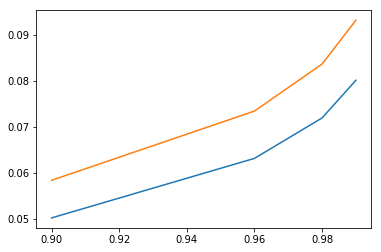

In [20]:
depend = []
for N in Ns:
    print("N = {}".format(N))
    Y = get_sorted_Y(N)
    pointME = get_point_ME(Y, N)
    mu2 = get_mu2(pointME, Y, N)
    intervalDis = get_interval_dis(mu2, N)
    depend.append(intervalDis[-1])
    plt.plot(gamma, intervalDis)
    exactME = np.log(7) / 3
    print("Точное матожидание: {}".format(exactME))
    D_true = 0.150699
    print("При точном матожидании:")
    intervalDis_true = get_interval_dis(D_true, N)
    plt.plot(gamma, intervalDis_true)
    plt.show()

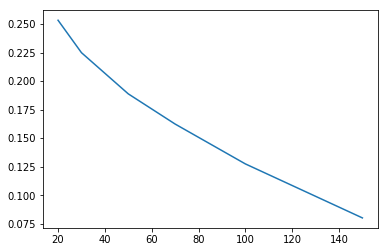

In [21]:
plt.plot(Ns, depend)